In [1]:
import pandas as pd
data = pd.read_csv("E:/LBSIM/FRP/Final Data.csv")

In [16]:
data['Sentiment']

0      Positive
1      Positive
2      Positive
3      Positive
4       Neutral
         ...   
360    Positive
361    Positive
362    Positive
363    Negative
364    Negative
Name: Sentiment, Length: 365, dtype: object

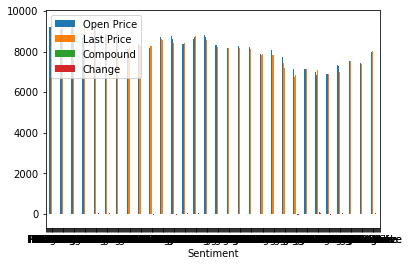

In [13]:
data.plot.bar(x='Sentiment',rot=0)

In [4]:
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
series1 = data['Open Price']
result1 = seasonal_decompose(series1, model='additive', freq=1)

series2 = data['Last Price']
result2 = seasonal_decompose(series2, model='additive', freq=1)
#result2.plot()

series3 = data['Change']
result3 = seasonal_decompose(series3, model='additive', freq=1)
#result3.plot()

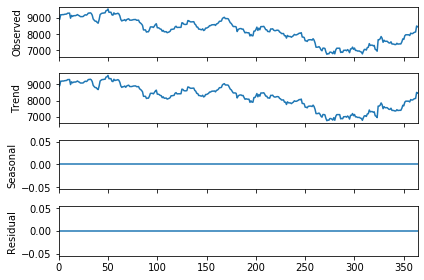

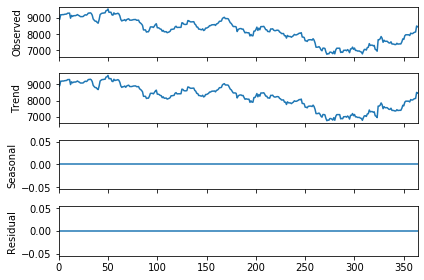

In [5]:
result1.plot()


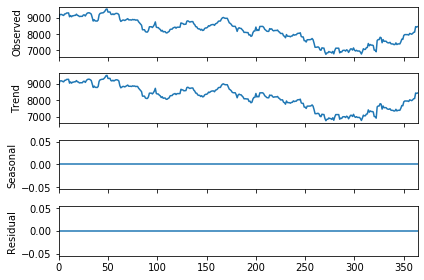

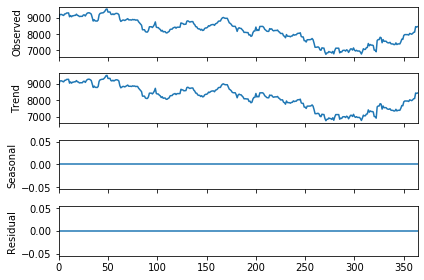

In [6]:
result2.plot()

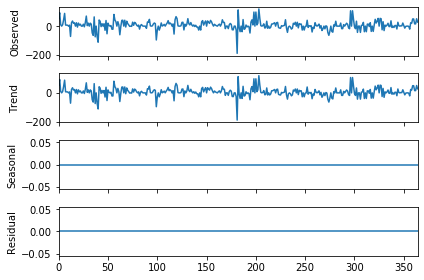

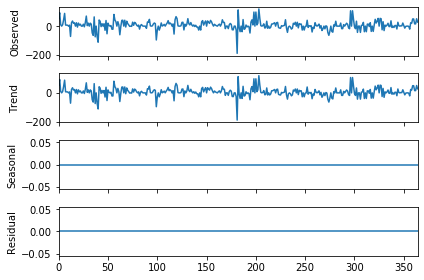

In [7]:
result3.plot()

In [13]:
#Checking stationarity
from statsmodels.tsa.stattools import kpss
result = kpss(series3)
result
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
#for key, value in result[2].items():
   # print('Critial Values:')
    #print(f'   {key}, {value}')

#The null hypothesis for test is that the data is stationary

KPSS Statistic: 0.1060566341118494
p-value: 0.1


C:\Users\Ssinghal\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [30]:
#Checking for autocorrelation
#The null hypothesis of the test is that there is no serial correlation
from statsmodels.stats.stattools import durbin_watson
#durbin_watson(series1, axis=0)
#durbin_watson(series2, axis=0)
dw = durbin_watson(series1, axis=0)
print(f'Test Statistic: {dw}')

Test Statistic: 0.00015331093496742172


In [29]:
#Checking heterosckedasticity
from statsmodels.stats.diagnostic import het_arch

het = het_arch(series1)
het
print(f'Test Statistic: {het[0]}')
print(f'p-value: {het[1]}')

Test Statistic: 341.2662684496429
p-value: 3.218495530021254e-62


In [27]:
#Checking normality
# (The test statistic, the p-value)
import scipy
import numpy as np
from scipy.stats import shapiro
series = np.log(data['Change'])
normal = shapiro(series)
normal

C:\Users\Ssinghal\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Ssinghal\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(nan, 1.0)

In [13]:
#Normalizing the data

from pandas import Series
from sklearn.preprocessing import MinMaxScaler
series = Series(data['Change'])
print(series)
# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print
data['Normalized'] = scaler.transform(values)

0      54.20
1      93.20
2       9.85
3       0.00
4       9.85
       ...  
360    50.02
361    15.63
362    15.63
363    51.40
364    28.55
Name: Change, Length: 365, dtype: float64
Min: -190.130000, Max: 120.100000


In [10]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(data[['Compound','Change']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0508  , p=0.0815  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=3.0762  , p=0.0794  , df=1
likelihood ratio test: chi2=3.0633  , p=0.0801  , df=1
parameter F test:         F=3.0508  , p=0.0815  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.9958  , p=0.0027  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=12.1592 , p=0.0023  , df=2
likelihood ratio test: chi2=11.9600 , p=0.0025  , df=2
parameter F test:         F=5.9958  , p=0.0027  , df_denom=358, df_num=2


{1: ({'ssr_ftest': (3.0508427549452453, 0.0815457431240602, 361.0, 1),
   'ssr_chi2test': (3.076196018836757, 0.07944613840512306, 1),
   'lrtest': (3.0632701910765263, 0.08008035198385817, 1),
   'params_ftest': (3.0508427549452137, 0.0815457431240602, 361.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.995842333607768, 0.002745998342718584, 358.0, 2),
   'ssr_chi2test': (12.15916629664592, 0.002289130682027807, 2),
   'lrtest': (11.959958875887878, 0.0025288782906318402, 2),
   'params_ftest': (5.995842333607836, 0.0027459983427183376, 358.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [30]:
data.corr(method='pearson',min_periods=1)

,Open Price,Last Price,Compound,Change
Open Price,1.000000,0.991244,0.149683,0.120759
Last Price,0.991244,1.000000,0.172110,0.124393
Compound,0.149683,0.172110,1.000000,0.147748
Change,0.120759,0.124393,0.147748,1.000000
